In [1]:
from __future__ import print_function, division
%matplotlib inline

# Your code goes here
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score, confusion_matrix

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset1 = pd.read_csv('test_1.csv',delimiter = ',')
data_neg = dataset1.loc[(dataset1['class']==0) & (dataset1['proj_span']>=10.0)]
data_pos = dataset1.loc[(dataset1['class']==1) & (dataset1['proj_span']>=10.0)]
print(data_neg.shape)
print(data_pos.shape)

(21820, 22)
(5993, 22)


In [3]:
dataset = pd.read_csv('test.csv',delimiter = ',')
dataset1 = pd.read_csv('test_1.csv',delimiter = ',') # this one does not take care the CRAN before GH date
dataset = dataset.loc[dataset['proj_span'] >= 10.0]
dataset1 = dataset1.loc[dataset1['proj_span'] >= 10.0]

In [4]:
X = (dataset.drop('class', axis=1)).drop('id', axis=1)
y = dataset['class']
dataset.shape

(27813, 22)

In [5]:
X_1 = (dataset1.drop('class', axis=1)).drop('id', axis=1)
y_1 = dataset1['class']
dataset1.shape

(27813, 22)

In [6]:

dataset1.describe()

,activity_intensity,class,final_teamsize,first_quater_teamsize,normalized_proj_span,num_CommitComment,num_Create,num_Delete,num_Fork,num_Gollum,...,num_Issues,num_Member,num_Public,num_PullRequest,num_PullRequestReviewComment,num_Push,num_Release,num_TeamAdd,num_Watch,proj_span
count,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,...,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000
mean,0.338187,0.215475,4.635099,4.554381,0.102066,0.100385,0.808794,0.488441,2.238917,0.389350,...,1.090605,0.074246,0.020099,5.193579,1.025564,14.056197,0.052745,0.007982,0.829936,186.270845
std,1.765379,0.411159,237.525007,237.526338,0.140559,1.271779,2.544591,3.373186,230.851355,6.798492,...,9.073136,0.490074,0.178863,39.217515,22.574237,52.149186,0.655811,0.100736,8.089224,256.520035
min,0.001468,0.000000,1.000000,0.000000,0.005479,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,0.043831,0.000000,1.000000,1.000000,0.015342,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,28.000000
50%,0.126761,0.000000,1.000000,1.000000,0.046027,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,84.000000
75%,0.335347,0.000000,2.000000,2.000000,0.129863,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,13.000000,0.000000,0.000000,0.000000,237.000000
max,267.739130,1.000000,39519.000000,39519.000000,0.986301,89.000000,117.000000,114.000000,38469.000000,649.000000,...,401.000000,34.000000,13.000000,4139.000000,2625.000000,6158.000000,54.000000,3.000000,607.000000,1800.000000


In [7]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.3, random_state=20190101)
X_tr_1, X_test_1, y_tr_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=20190101)

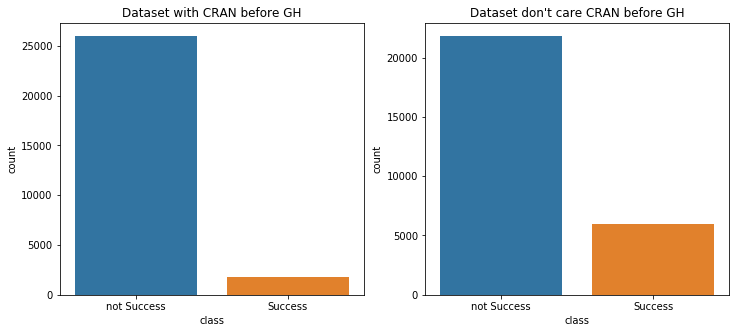

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='class', data=dataset)
ax1.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset with CRAN before GH')
ax2 = plt.subplot(1,2,2)
sns.countplot(x='class', data=dataset1)
ax2.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset don\'t care CRAN before GH')
plt.show()

In [9]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
ca = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))
confusion_matrix(y_pred=y_pred, y_true=y_test)

Classification accuracy of the LogisticRegression classifier on training set: 0.93318
Precision on train: 0.34911
Recall on train: 0.04720

Classification accuracy of the LogisticRegression classifier on test set: 0.92749
Precision on test: 0.37037
Recall on test: 0.05137


array([[7709,   51],
       [ 554,   30]])

In [10]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-7.67942709e-01 -3.08858079e-01  8.34245840e-02  6.37150001e-07
   6.18498294e-02  2.71538473e-01 -5.14369324e-01  2.23403723e-01
  -1.05526435e-01 -2.09146639e-02  8.80533658e-02 -7.31509205e-02
  -4.03973231e-02  1.47951362e-02  4.21030900e-03 -2.45371893e-03
   1.34290646e-01 -4.76566975e-03  2.27280429e-01  1.16279875e-03]]
[-2.64553923]


In [11]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [13]:
# on dataset_1
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr_1, y_tr_1)
ca = lr.score(X_tr_1, y_tr_1)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_test_1, y_test_1)
y_pred = lr.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.80780
Precision on train: 0.70473
Recall on train: 0.14913

Classification accuracy of the LogisticRegression classifier on test set: 0.79422
Precision on test: 0.74387
Recall on test: 0.14399


In [14]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-5.29828601e-01 -1.35283178e-01  1.55324332e-01  7.46390222e-07
  -3.98118848e-02  2.15372850e-01  2.61118097e-01 -6.79750539e-02
  -2.48658206e-02  1.65496596e-02  1.40991179e-02 -8.12253788e-02
  -5.50726350e-02 -4.36994443e-03  8.92615773e-03 -1.88510684e-02
  -1.25162221e-02 -1.12801594e-02 -1.66178445e-02  1.36216215e-03]]
[-1.51448536]


In [15]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [16]:
# transform the data
ss = StandardScaler()
ss.fit(X_tr)
X_tr = ss.transform(X_tr)
X_test = ss.transform(X_test)

ss1 = StandardScaler()
ss1.fit(X_tr_1)
X_tr_1 = ss.transform(X_tr_1)
X_test_1 = ss.transform(X_test_1)

In [17]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.93497
Precision on train: 0.42308
Recall on train: 0.03520

Classification accuracy of the LogisticRegression classifier on test set: 0.92893
Precision on test: 0.41176
Recall on test: 0.03596


In [18]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-0.00450831 -0.18776833  0.45993861  0.21014321  0.00788932  0.51336713
  -0.813601   -0.48636341 -0.09522193 -0.03986958  0.17408188 -0.03486568
  -0.03000811  0.0594795   0.02925375 -0.0597464  -0.07815385 -0.02439169
  -0.03126276  0.21014321]]
[-2.93340217]


In [19]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [20]:
# on dataset_1
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr_1, y_tr_1)
ca = lr.score(X_tr_1, y_tr_1)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_test_1, y_test_1)
y_pred = lr.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on test set: {:.5f}'.format(ca))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Classification accuracy of the LogisticRegression classifier on training set: 0.80775
Precision on train: 0.68632
Recall on train: 0.15914

Classification accuracy of the LogisticRegression classifier on test set: 0.79518
Precision on test: 0.72861
Recall on test: 0.15717


In [21]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-0.55114486 -1.22486499  1.74677539  0.18740666 -0.0922864   0.7049485
   0.84166146 -1.63641074 -0.09491037  0.38657012  0.08689872 -0.1371789
  -0.1921194  -0.00214079  0.04262487 -0.60193888 -0.20505716 -0.07103995
  -0.04467461  0.18740666]]
[-1.51324741]


In [22]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [23]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
accuracy_score_train = rf.score(X_tr, y_tr)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
accuracy_score_test = rf.score(X_test, y_test)
print('\nAccuracy score on the test dataset: {:.5f}'.format(accuracy_score_test))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Accuracy score on the training dataset: 0.9950177204787097
Precision on train: 0.99570
Recall on train: 0.92640

Accuracy score on the test dataset: 0.93013
Precision on test: 0.50265
Recall on test: 0.16267


In [24]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [25]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 10 most important features:')
for n in range(10):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 10 most important features:
1. activity_intensity
2. normalized_proj_span
3. proj_span
4. num_Push
5. num_Create
6. num_PullRequest
7. first_quater_teamsize
8. final_teamsize
9. num_Fork
10. num_Issues


In [26]:
# dataset_1
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr_1, y_tr_1)
y_pred = rf.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
accuracy_score_train = rf.score(X_tr_1, y_tr_1)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
accuracy_score_test = rf.score(X_test_1, y_test_1)
print('\nAccuracy score on the test dataset: {:.5f}'.format(accuracy_score_test))
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Accuracy score on the training dataset: 0.9839745236016231
Precision on train: 0.98588
Recall on train: 0.93727

Accuracy score on the test dataset: 0.85463
Precision on test: 0.77607
Recall on test: 0.50633


In [27]:
# cm = confusion_matrix(y_pred=y_pred, y_true=y_test_1)
# # retrive the normalized version of cm
# cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

# plt.figure()
# plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
# plt.show()

In [28]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 10 most important features:')
for n in range(10):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 10 most important features:
1. activity_intensity
2. proj_span
3. normalized_proj_span
4. num_Create
5. num_Push
6. num_Delete
7. num_PullRequest
8. first_quater_teamsize
9. final_teamsize
10. num_Fork


In [29]:
# svc_linear = SVC(kernel='linear')
# svc_linear.fit(X_tr, y_tr)
# ca = svc_linear.score(X_tr, y_tr)
# print('Linear SVC classification accuracy on training set: {:.5f}'.format(ca))
# ca = svc_linear.score(X_test, y_test)
# print('Linear SVC classification accuracy on test set: {:.5f}'.format(ca))

In [30]:


svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr, y_tr)
ca = svc_rbf.score(X_tr, y_tr)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_test, y_test)
print('Radial Basis Function SVC classification accuracy on test set: {:.5f}'.format(ca))

# svc_poly = SVC(kernel='poly')
# svc_poly.fit(X_tr, y_tr)
# ca = svc_poly.score(X_tr, y_tr)
# print('\nPolynomial SVC classification accuracy on training set: {:.5f}'.format(ca))
# ca = svc_poly.score(X_test, y_test)
# print('Polynomial SVC classification accuracy on test set: {:.5f}'.format(ca))


Radial Basis Function SVC classification accuracy on training set: 0.94052
Radial Basis Function SVC classification accuracy on test set: 0.92977


In [31]:
y_pred = svc_rbf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = svc_rbf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))


Precision on train: 0.95098
Recall on train: 0.07760
Precision on test: 0.33333
Recall on test: 0.00342


In [32]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr_1, y_tr_1)
ca = svc_rbf.score(X_tr_1, y_tr_1)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_test_1, y_test_1)
print('Radial Basis Function SVC classification accuracy on test set: {:.5f}'.format(ca))


Radial Basis Function SVC classification accuracy on training set: 0.83877
Radial Basis Function SVC classification accuracy on test set: 0.81663


In [33]:
y_pred = svc_rbf.predict(X_tr_1)
p = precision_score(y_pred=y_pred,y_true=y_tr_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr_1, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = svc_rbf.predict(X_test_1)
p = precision_score(y_pred=y_pred,y_true=y_test_1, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test_1, pos_label=1)
print('Precision on test: {:.5f}'.format(p))
print('Recall on test: {:.5f}'.format(r))

Precision on train: 0.88381
Recall on train: 0.26922
Precision on test: 0.87347
Recall on test: 0.22574
